# Clustering 
**Adapted from Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron**

https://github.com/ageron/handson-ml

- Unsupervised learning.
- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).
- Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib#
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

Just like in classification, each instance gets assigned to a group. However, unlike classification, clustering is an unsupervised task. Consider Figure 9-1: on the left is the iris dataset (introduced in Chapter 4), where each instance’s species (i.e., its class) is represented with a different marker. It is a labeled dataset, for which classification algorithms such as Logistic Regression, SVMs, or Random Forest classifiers are well suited. On the right is the same dataset, but without the labels, so you cannot use a classification algorithm anymore. This is where clustering algorithms step in: many of them can easily detect the lower-left cluster. It is also quite easy to see with our own eyes, but it is not so obvious that the upper-right cluster is composed of two distinct sub-clusters. That said, the dataset has two additional features (sepal length and width), not represented here, and clustering algorithms can make good use of all features, so in fact they identify the three clusters fairly well (e.g., using a Gaussian mixture model, only 5 instances out of 150 are assigned to the wrong cluster).

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0901.png)

Clustering is used in a wide variety of applications, including these:

- *For customer segmentation*: You can cluster your customers **based on their purchases and their activity on your website**. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, customer segmentation can be useful in **recommender systems** to suggest content that other users in the same cluster enjoyed.
- *For data analysis*: When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately.
- *As a dimensionality reduction technique*: Once a dataset has been clustered, it is usually possible to measure each **instance’s affinity with each cluster** (affinity is any measure of how well an instance fits into a cluster). Each instance’s feature vector $x$ can then be replaced with the vector of its cluster affinities. If there are $k$ clusters, then this vector is $k$-dimensional. This vector is typically much **lower-dimensional** than the original feature vector, but it can preserve enough information for further processing.
- *For anomaly detection (also called outlier detection)*: Any instance that has a **low affinity to all the clusters** is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.
- *For semi-supervised learning*: If you only have a few labels, you could perform clustering and **propagate the labels to all the instances in the same cluster**. This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm, and thus improve its performance.
- *For search engines*: Some search engines let you **search for images that are similar to a reference image**. To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is use the trained clustering model to find this image’s cluster, and you can then simply return all the images from this cluster.
- *To segment an image*: By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in the image. Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.


## k-Means

Consider the unlabeled dataset represented in Figure 9-2: you can clearly see five blobs of instances. The K-Means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often in just a few iterations. It was proposed by Stuart Lloyd at Bell Labs in 1957 as a technique for pulse-code modulation, but it was only published outside of the company in 1982.1 In 1965, Edward W. Forgy had published virtually the same algorithm, so K-Means is sometimes referred to as Lloyd–Forgy

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0902.png)

Train a k-Means clusterer and find each blob's center and assign each instance to the closest blob.

Generate a two-dimensional dataset containing four distinct blobs: 

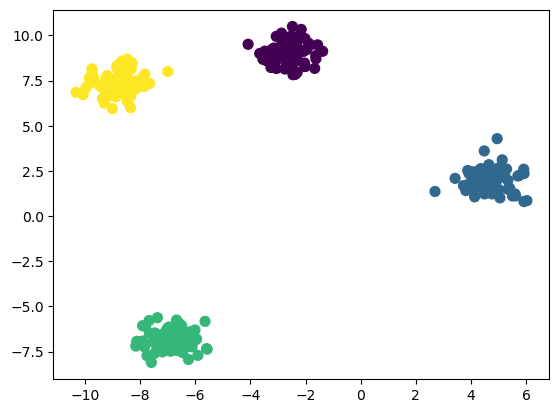

In [2]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, n_features=2,
                       cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_true);

In [4]:
y_true

array([3, 3, 0, 2, 3, 2, 1, 2, 0, 1, 0, 1, 0, 0, 3, 0, 3, 1, 0, 0, 1, 0,
       2, 3, 0, 3, 3, 2, 2, 1, 0, 1, 3, 1, 3, 0, 3, 2, 3, 2, 1, 0, 3, 2,
       0, 0, 3, 1, 3, 1, 2, 3, 2, 0, 2, 1, 3, 1, 1, 0, 3, 1, 1, 3, 2, 2,
       2, 2, 2, 0, 2, 2, 3, 1, 0, 3, 2, 2, 0, 2, 0, 0, 3, 0, 2, 3, 3, 1,
       1, 1, 3, 0, 3, 0, 0, 3, 2, 0, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 2, 3,
       1, 0, 0, 0, 0, 1, 3, 2, 3, 2, 2, 2, 0, 3, 2, 3, 3, 0, 3, 2, 1, 0,
       0, 0, 0, 1, 1, 3, 0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 3, 1, 2,
       0, 1, 2, 3, 3, 1, 0, 3, 2, 3, 1, 3, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 2, 3, 0, 3, 1, 1, 3, 2, 0, 1, 1, 2, 2, 2, 3, 1, 2, 2, 1,
       1, 3, 0, 0, 2, 1, 0, 2, 2, 3, 2, 0, 0, 2, 2, 1, 3, 2, 3, 3, 0, 3,
       3, 2, 3, 2, 1, 1, 3, 3, 1, 1, 1, 3, 0, 2, 1, 2, 3, 1, 3, 3, 3, 2,
       2, 1, 3, 2, 2, 2, 3, 2, 3, 2, 3, 1, 2, 3, 1, 0, 3, 0, 1, 0, 3, 0,
       2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 3, 3, 2, 0, 0, 1, 1, 1, 1, 2, 3, 1,
       2, 1, 1, 2, 0, 2, 1, 0, 3, 0, 1, 0, 3, 3])

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

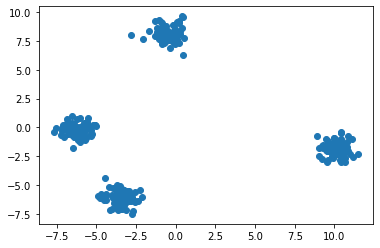

In [4]:
plt.scatter(X2D[:,0], X2D[:,1])

In [5]:
pca.explained_variance_ratio_

array([0.58962351, 0.41037649])

In [17]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)
kmeans.fit(X)
y_pred = kmeans.predict(X)

Plot the cluster centers as determined by the k-means estimator:

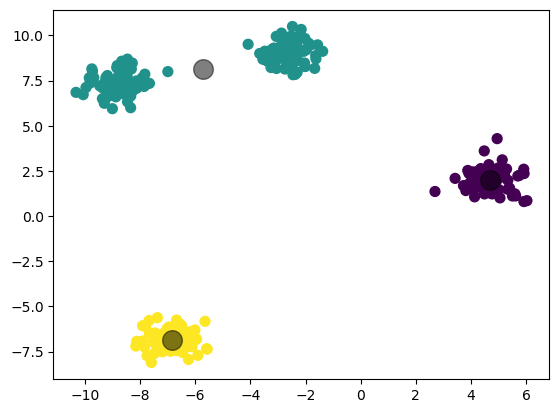

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

And the following 4 _centroids_ (i.e., cluster centers) were estimated:

In [9]:
kmeans.cluster_centers_

array([[ 4.68687447,  2.01434593],
       [-5.7198651 ,  8.11855424],
       [-6.85126211, -6.85031833]])

We can predict the labels of new instances:

In [10]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 1, 1], dtype=int32)

In [11]:
kmeans.transform(X_new)  # gives the distance to all centroids

array([[ 4.68689643,  8.37577237, 11.19231553],
       [ 1.68693547, 10.65235905, 13.2429415 ],
       [ 7.74980987,  5.79631466, 10.57643565],
       [ 7.70220092,  6.24226064, 10.11240192]])

If you plot the cluster’s decision boundaries, you get a **Voronoi tessellation** (see Figure 9-3, where each centroid is represented with an X).

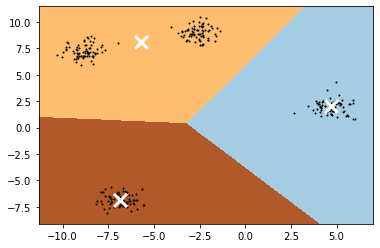

In [12]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

The vast majority of the instances were clearly assigned to the appropriate cluster, but a few instances were probably mislabeled (especially near the boundary between the top-left cluster and the central cluster). Indeed, the K-Means algorithm **does not behave very well when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid**.

### How does it work

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0904.png)

Although the algorithm is **guaranteed to converge, it may not converge to the right solution** (i.e., it may converge to a local optimum): whether it does or not depends on the centroid initialization. Figure 9-5 shows two suboptimal solutions that the algorithm can converge to if you are not lucky with the random initialization step.

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0905.png)

In [19]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1)

### Mini-Batch

Yet another important variant of the K-Means algorithm was proposed in a 2010 paper by David Sculley.6 Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of three or four and makes it possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements this algorithm in the MiniBatchKMeans class. You can just use this class like the KMeans class:

In [20]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0906.png)

### Inertia (DE: Trägheit)

That metric is called the model’s **inertia**, which is the **mean squared distance between each instance and its closest centroid**. It is roughly equal to $223.3$ for the model on the left in Figure 9-5, $237.5$ for the model on the right in Figure 9-5, and $211.6$ for the model in Figure 9-3. The KMeans class runs the algorithm `n_init` times and keeps the model with the lowest inertia. In this example, the model in Figure 9-3 will be selected (unless we are very unlucky with `n_init` consecutive random initializations). If you are curious, a model’s inertia is accessible via the `inertia_` instance variable:

To select the best model, clustering is an unsupervised task, so we do not have the labels. 

But we can measure the distance between each instance and its centroid: _inertia_ metric

In [21]:
kmeans.inertia_

1745.3081963000022

The `score()` method returns the negative inertia. Why negative? Because a predictor’s score() method must always respect Scikit-Learn’s “greater is better” rule: if a predictor is better than another, its score() method should return a greater score.

In [22]:
kmeans.score(X)

-1745.3081963000018

So far, we have set the number of clusters $k$ to $5$ because it was obvious by looking at the data that this was the correct number of clusters. But in general, it will not be so easy to know how to set k, and the result might be quite bad if you set it to the wrong value. As you can see in Figure 9-7, setting k to 3 or 8 results in fairly bad models.

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0907.png)

You might be thinking that we could just pick the model with the lowest inertia, right? Unfortunately, it is not that simple. The inertia for k=3 is 653.2, which is much higher than for k=5 (which was 211.6). But with k=8, the inertia is just 119.1. **The inertia is not a good performance metric when trying to choose k because it keeps getting lower as we increase k**. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. Let’s plot the inertia as a function of k (see Figure 9-8).

In [23]:
ls_inertia = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    ls_inertia.append(inertia)

Plot the inertia as a function of k: the elbow means that less clusters than that would be bad, and more clusters would not help much.

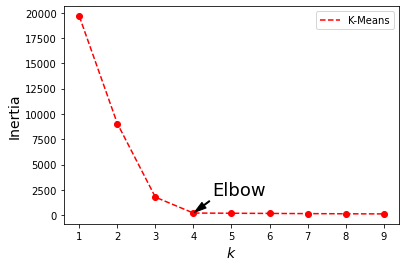

In [24]:
plt.plot(range(1, 10), ls_inertia, "r--", label="K-Means")
plt.plot(range(1,10), ls_inertia, "ro")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14);
plt.annotate("Elbow", xy=(4, ls_inertia[3]), xytext=(4.5,2000), fontsize=18, arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=7))
plt.legend()

As you can see, the inertia drops very quickly as we increase $k$ up to $4$, but then it decreases much more slowly as we keep increasing $k$. This curve has roughly the shape of an arm, and there is an “elbow” at $k = 4$. So, if we did not know better, $4$ would be a good choice: any lower value would be dramatic, while any higher value would not help much, and we might just be splitting perfectly good clusters in half for no good reason.

In this case k should be at least 4.

The **Silhouette Coefficient** is a measure of how well samples are clustered with samples that are similar to themselves.

It is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. 

$\text{Silhouette Coefficient} = \frac{b - a}{max(a, b)}$

It is only defined if the number of labels is: 2 <= n_labels <= n_samples - 1.

The silhouette coefficient can vary between –1 and +1. A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to –1 means that the instance may have been assigned to the wrong cluster.

In [25]:
from sklearn.metrics import silhouette_score

ls_score = []

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)
    score = silhouette_score(X, y_pred)
    ls_score.append(score)

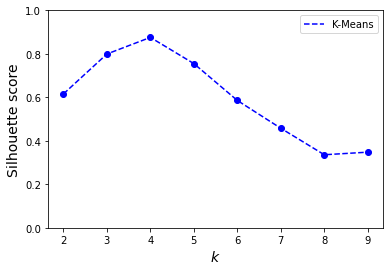

In [26]:
plt.plot(range(2, 10), ls_score, "b--", label="K-Means")
plt.plot(range(2, 10), ls_score, "bo")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14);
plt.ylim([0,1])
plt.legend()

The best value is $k=4$. As you can see, this visualization is much richer than the previous one: although it confirms that $k = 4$ is a very good choice, it also underlines the fact that $k = 5$ is quite good as well, and much better than $k = 6$ or $7$. This was not visible when comparing inertias.

An even more informative visualization is obtained when you plot **every instance’s silhouette coefficient**, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a **silhouette diagram** (see Figure 9-10). Each diagram contains **one knife shape per cluster**. The shape’s height indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better). The dashed line indicates the mean silhouette coefficient.

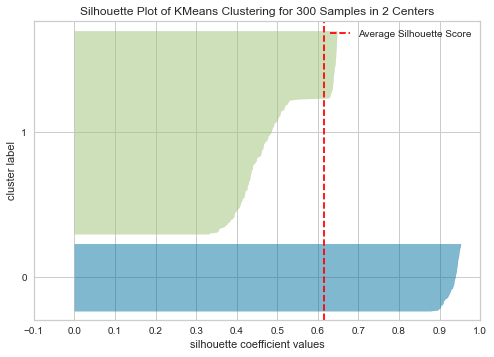

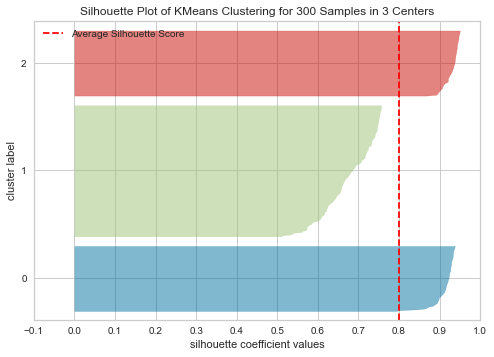

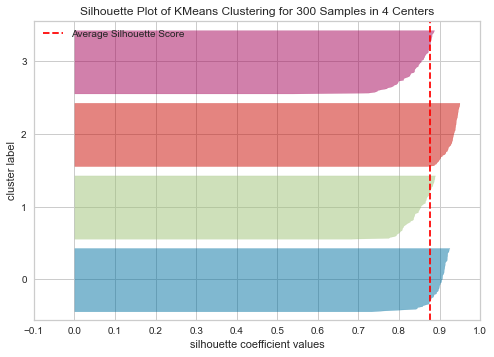

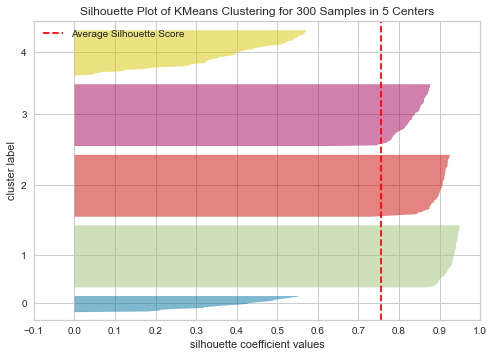

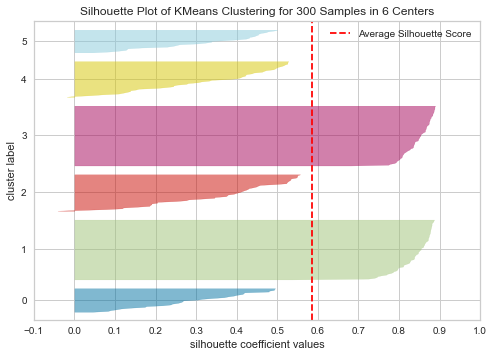

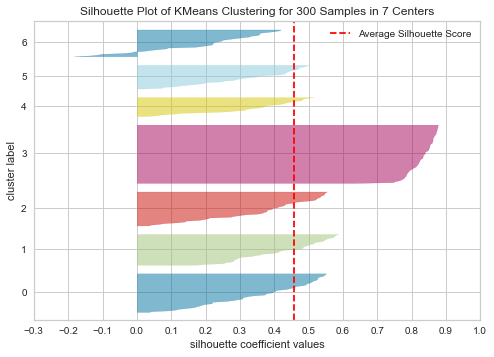

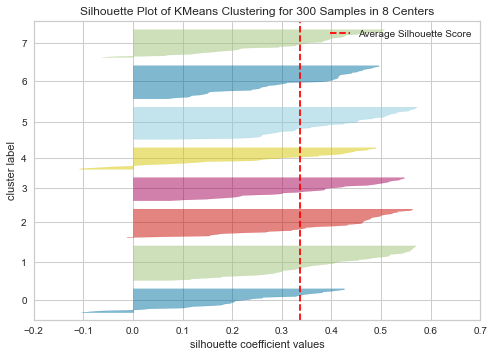

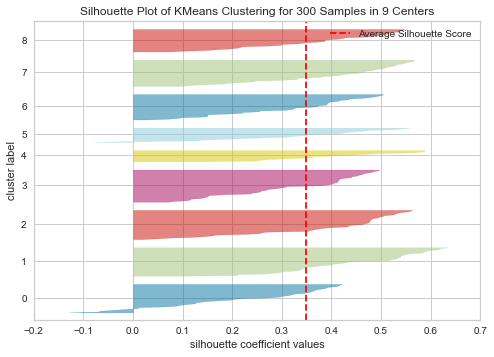

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer

for k in range(2,10):
    model = KMeans(k, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

The vertical dashed lines represent the silhouette score for each number of clusters. **When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad** since this means its instances are much too close to other clusters. We can see that when k = 3 and when k = 6, we get bad clusters. But when k = 4 or k = 5, the clusters look pretty good: most instances extend beyond the dashed line, to the right and closer to 1.0. When k = 4, the cluster at index 1 (the third from the top) is rather big. When k = 5, all clusters have similar sizes. So, even though the overall silhouette score from k = 4 is slightly greater than for k = 5, it seems like a good idea to use k = 5 to get clusters of similar sizes.

In [29]:
df = pd.DataFrame(X, columns=["X1", "X2"])
df["cluster"] = kmeans.labels_

df.groupby("cluster").agg(["mean", "min", "max"])

X1                             X2                     
             mean        min       max      mean       min        max
cluster                                                              
0        5.154045   4.667222  6.028674  1.962123  0.801917   4.284809
1       -8.774407  -9.363699 -8.117599  6.818241  5.942370   7.293380
2       -6.460457  -7.589582 -5.565745 -7.097717 -8.103649  -5.826905
3       -2.808608  -4.081045 -1.667521  8.642889  7.821745   9.507428
4       -9.611173 -10.321314 -9.104904  7.439840  6.718671   8.143647
5       -8.330573  -8.843111 -6.990999  7.918710  7.174101   8.685939
6       -7.297897  -8.153965 -6.492402 -6.567577 -7.724588  -5.624677
7        4.180773   2.695118  4.647680  2.070921  1.064261   3.605271
8       -2.316417  -3.060852 -1.377486  9.489451  8.703324  10.492231

### Limits of K-Means

Despite its many merits, most notably being fast and scalable, K-Means is not perfect. As we saw, it is necessary to run the algorithm several times to avoid suboptimal solutions, plus you need to specify the number of clusters, which can be quite a hassle. Moreover, K-Means does not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes. For example, Figure 9-11 shows how K-Means clusters a dataset containing three ellipsoidal clusters of different dimensions, densities, and orientations.

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0911.png)

### Using Clustering for Preprocessing

_digits dataset_ which is a simple MNIST-like dataset containing 1,797 grayscale 8×8 images representing digits 0 to 9.

In [30]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [32]:
X_train /= 16
X_test /= 16

Fit a Logistic Regression model and evaluate it on the test set:

In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, max_iter=1e5)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=100000.0, random_state=42)

In [34]:
log_reg.score(X_test, y_test)

0.9688888888888889

The baseline accuracy is 96.7%

Use K-Means as a preprocessing step:

In [35]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)), # Transform! So instead of original data the distance to each cluster is used as input to LogReg
    ("log_reg", LogisticRegression(random_state=42, max_iter=1e5)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=100000.0, random_state=42))])

In [36]:
pipeline.score(X_test, y_test)

0.9733333333333334

We almost divided the error rate by a factor of 2.

Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for $k$ is much simpler than earlier: there's no need to perform silhouette analysis or minimize the inertia, the best value of $k$ is simply the one that results in the best classification performance.

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.3s
[CV] END ...............................kmeans_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=100000.0,
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [38]:
grid_clf.best_params_

{'kmeans__n_clusters': 77}

In [39]:
grid_clf.score(X_test, y_test)

0.9733333333333334

## DBSCAN

This algorithm defines clusters as continuous regions of high density. Here is how it works:

1. For each instance, the algorithm counts how many instances are located within a small distance $\epsilon$ (epsilon) from it. This region is called the instance’s ε-neighborhood.
1. If an instance has at least `min_samples` instances in its ε-neighborhood (including itself), then it is considered a core instance. In other words, core instances are those that are located in dense regions.
1. All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.
1. Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

This algorithm works well if all the clusters are dense enough and if they are well separated by low-density regions. The DBSCAN class in Scikit-Learn is as simple to use as you might expect. Let’s test it on the moons dataset, introduced in Chapter 5:

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fyanpuli.github.io%2Fimages%2F6.png&f=1&nofb=1)

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F12000%2F1*Zj0qAtMDenWQg2LMrJyFxw.png&f=1&nofb=1)

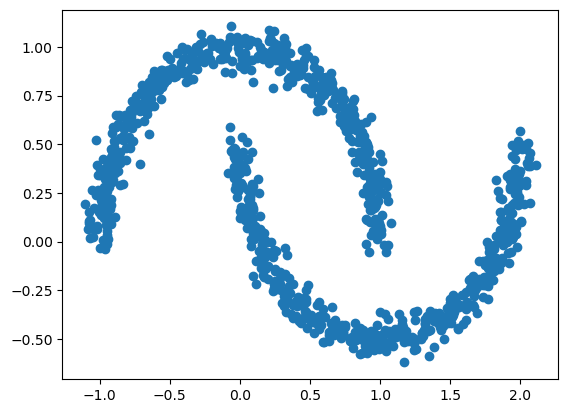

In [28]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)

plt.scatter(X[:,0], X[:,1])

In [20]:
X[y == 1, 1] += 0.5

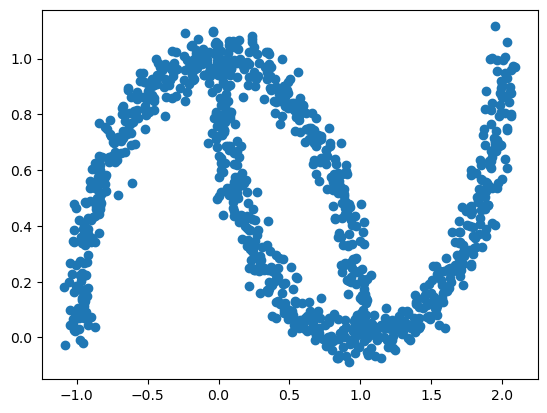

In [21]:
plt.scatter(X[:,0], X[:,1])

In [22]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)


KMeans(n_clusters=2)

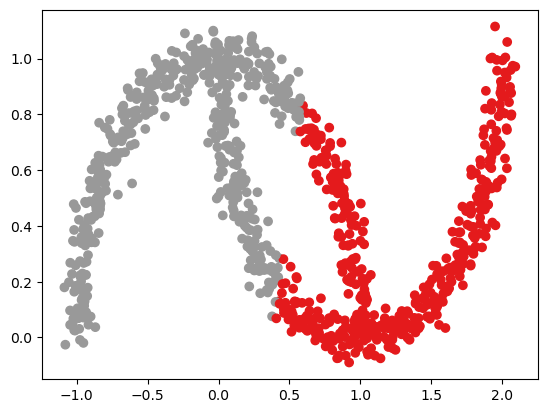

In [23]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="Set1")

In [42]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.07, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.07, min_samples=3)

In [46]:
dbscan.labels_

array([ 0,  1,  0,  0,  1,  0,  1,  1,  2,  0,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  0,  1,  0,  0,  1,  1,  0,  1,  0,  0,  2,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0, -1,
        2,  2,  0,  0,  1,  1,  0,  1,  1,  1,  1, -1,  2,  0,  1,  1,  0,
        0,  1,  1,  1,  0,  1, -1,  1,  0,  0,  1,  1,  1,  1,  0,  2,  1,
        1,  0,  0,  2,  0,  1,  2,  0,  1,  0,  0,  1,  1,  0,  0,  1,  0,
        0,  1,  1,  1,  0, -1,  0,  1,  1,  0,  0,  0,  1,  0,  1,  1, -1,
        2,  1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  0,  2,  2,  1,
        1,  1,  1,  1,  1,  0, -1,  0,  1,  1,  0, -1,  1, -1,  0,  0,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  0,  0,  1,  0, -1,  1,  1,  1,  1,
        0,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0, -1,  1,  0,  0,  1,  1,
        2,  0,  2,  0,  0,  2, -1,  1,  0,  1,  1,  2,  0,  0,  1,  0,  1,
       -1,  1,  1,  0,  1,  2,  1,  2,  1,  0,  1,  1,  0,  0,  0, -1, -1,
        0,  0,  1,  1,  1

Notice that some instances have a cluster index equal to $–1$, which means that they are considered as **anomalies** by the algorithm. The indices of the core instances are available in the `core_sample_indices_` instance variable, and the core instances themselves are available in the `components_` instance variable:

In [47]:
print(len(dbscan.core_sample_indices_))
print(dbscan.core_sample_indices_)
print(dbscan.components_)

814
[  0   1   2   3   4   5   6   7   8   9  10  11  12  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  34  35  36  39  40  41
  42  43  44  45  47  48  49  51  52  53  54  55  56  57  58  59  60  61
  63  64  65  67  68  71  72  73  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  98  99 100 101 102 103
 104 105 106 109 110 111 112 113 114 115 116 117 119 120 121 122 123 124
 125 126 127 128 129 130 131 133 134 135 136 137 138 139 140 141 143 144
 145 146 148 150 151 152 153 155 156 157 158 159 160 161 163 164 166 167
 168 169 170 172 174 175 176 177 178 179 180 182 183 184 185 186 187 188
 189 190 191 192 197 198 199 200 201 202 203 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 221 223 224 225 227 228 230 231 232 233 236
 238 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 257
 258 259 260 261 263 265 266 267 268 269 270 271 272 273 274 276 278 279
 280 281 282 287 288 290 293 295 296 297 298 30

This clustering is represented in the lefthand plot of Figure 9-14. As you can see, it identified quite a lot of anomalies, plus seven different clusters. How disappointing! Fortunately, if we widen each instance’s neighborhood by increasing eps to $0.2$, we get the clustering on the right, which looks perfect. Let’s continue with this model.

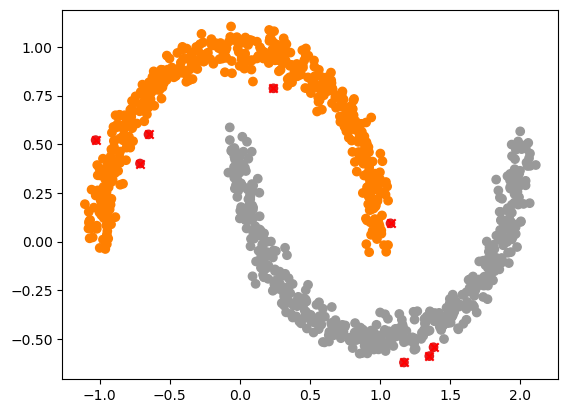

In [43]:
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap="Set1")
plt.scatter(X[dbscan.labels_ == -1, 0], X[dbscan.labels_ == -1, 1], c="r", marker="x")


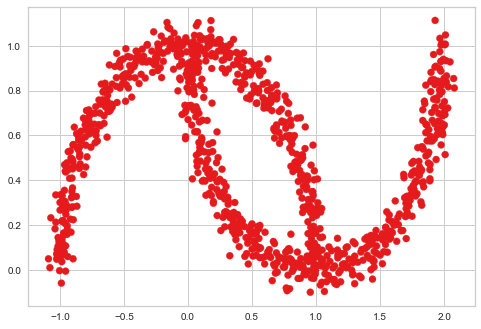

In [49]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap="Set1")
plt.scatter(X[dbscan.labels_ == -1, 0], X[dbscan.labels_ == -1, 1], c="r", marker="x")

## Spectral Clustering

- It does a low-dimension embedding of the affinity matrix between samples, followed by a k-Means in the low dimensional space.
- It requires the number of clusters to be specified.
- It works well for a small number of clusters but is not advised when using many clusters.
- Uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-Means algorithm.

In [50]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

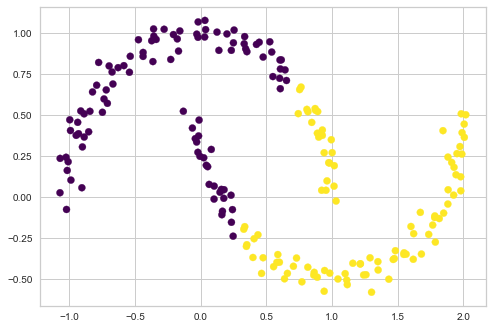

In [51]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

/Users/miay/miniconda3/envs/ml-mit-python/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


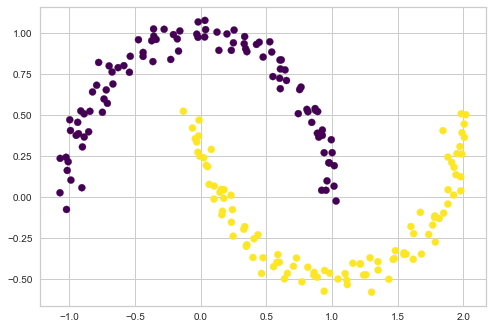

In [52]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## Gaussian Mixtures

- This model attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset.
- It measures the probability that any point belongs to the given cluster.
- Each cluster is associated not with a hard-edged sphere, but with a smooth Gaussian model.

In [53]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [54]:
X.shape

(150, 4)

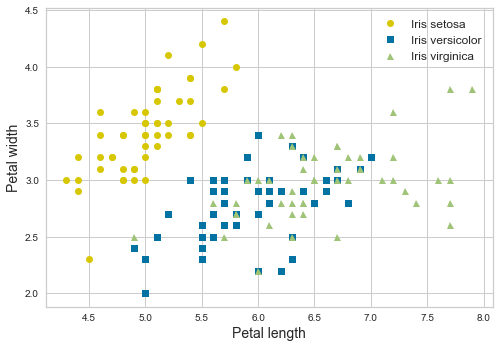

In [55]:
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12);

In [56]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)
y_pred = gm.predict(X)

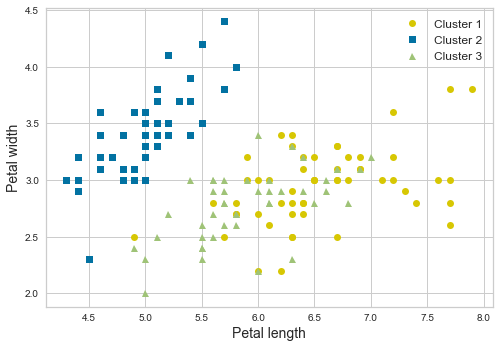

In [57]:
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper right", fontsize=12);

A Gaussian mixture model (explained below) can actually separate these clusters pretty well.

The mean of each mixture component:

In [58]:
gm.means_

array([[6.54639415, 2.94946365, 5.48364578, 1.98726565],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9170732 , 2.77804839, 4.20540364, 1.29848217]])

The covariance of each mixture component. The shape depends on covariance_type:

- (n_components,)                        if 'spherical'
- (n_features, n_features)               if 'tied'
- (n_components, n_features)             if 'diag',
- (n_components, n_features, n_features) if 'full'  (default)

In [59]:
gm.covariances_

array([[[0.38744093, 0.09223276, 0.30244302, 0.06087397],
        [0.09223276, 0.11040914, 0.08385112, 0.05574334],
        [0.30244302, 0.08385112, 0.32589574, 0.07276776],
        [0.06087397, 0.05574334, 0.07276776, 0.08484505]],

       [[0.121765  , 0.097232  , 0.016028  , 0.010124  ],
        [0.097232  , 0.140817  , 0.011464  , 0.009112  ],
        [0.016028  , 0.011464  , 0.029557  , 0.005948  ],
        [0.010124  , 0.009112  , 0.005948  , 0.010885  ]],

       [[0.2755171 , 0.09662295, 0.18547072, 0.05478901],
        [0.09662295, 0.09255152, 0.09103431, 0.04299899],
        [0.18547072, 0.09103431, 0.20235849, 0.06171383],
        [0.05478901, 0.04299899, 0.06171383, 0.03233775]]])

Did the algorithm actually converge?

In [60]:
gm.converged_

True

How many iterations did it take to converge?

In [61]:
gm.n_iter_

17

Use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster:

In [62]:
gm.predict([[6.1, 2.4, 5.8, 1.7]])

array([0])

In [63]:
gm.predict_proba([[6.1, 2.4, 5.8, 1.7]])

array([[9.99999994e-001, 3.00473951e-160, 6.34934576e-009]])

This is a generative model, so you can sample new instances from it (and get their labels):

In [64]:
X_new, y_new = gm.sample(6)
X_new

array([[6.26554626, 2.46240184, 5.22288902, 1.56777107],
       [5.65166177, 2.37811245, 4.68045115, 1.7140479 ],
       [6.0686817 , 3.03759619, 4.44343397, 1.25218655],
       [6.63083686, 3.10811039, 5.11092622, 1.59415175],
       [6.20232335, 3.39432653, 4.51721182, 1.54267166],
       [5.62098103, 2.88871941, 4.3787232 , 1.41186159]])

In [65]:
y_new

array([0, 0, 2, 2, 2, 2])

## Comparing different clustering algorithms on toy datasets

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

Notice that they are sampled sequentially from each cluster.

## Exercise

Using the [Credit Card Dataset](https://www.kaggle.com/arjunbhasin2013/ccdata):
- Inspect the data.
- Compare different methods to find the number of clusters.
- Build a model with the chosen *k*.

- `CUST_ID`: Identification of Credit Card holder (Categorical) 
- `BALANCE`: Balance amount left in their account to make purchases
- `BALANCE_FREQUENCY`: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not - `frequently updated) 
- `PURCHASES`: Amount of purchases made from account 
- `ONEOFF_PURCHASES`: Maximum purchase amount done in one-go 
- `INSTALLMENTS_PURCHASES`: Amount of purchase done in installment 
- `CASH_ADVANCE`: Cash in advance given by the user 
- `PURCHASES_FREQUENCY`: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently -purchased, 0 = not frequently purchased)
- `ONEOFF_PURCHASES_FREQUENCY`: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 
- `PURCHASES_INSTALLMENTS_FREQUENCY`: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) 
- `CASH_ADVANCE_FREQUENCY`: How frequently the cash in advance being paid 
- `CASH_ADVANCE_TRX`: Number of Transactions made with "Cash in Advanced" 
- `PURCHASES_TRX`: Number of purchase transactions made 
- `CREDIT_LIMIT`: Limit of Credit Card for user 
- `PAYMENTS`: Amount of Payment done by user 
- `MINIMUM_PAYMENTS`: Minimum amount of payments made by user 
- `PRC_FULL_PAYMENT`: Percent of full payment paid by user 
- `TENURE`: Tenure of credit card service for user

In [66]:
import pandas as pd

df = pd.read_csv("data/ccdata.zip")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/ccdata.zip'